# 链家房源数据采集

In [1]:
import requests
import parsel
url = "https://bj.lianjia.com/ershoufang/"
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}

In [2]:
reponse = requests.get(url=url,headers=headers)

In [3]:
print(reponse)

<Response [200]>


<!DOCTYPE html><html><head><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge" /><meta http-equiv="Cache-Control" content="no-transform" /><meta http-equiv="Cache-Control" content="no-siteapp" /><meta http-equiv="Content-language" content="zh-CN" /><meta name="format-detection" content="telephone=no" /><meta name="applicable-device" content="pc"><meta name="location" content="province=北京;city=北京;coord=39.8992,116.4138" /><link rel="alternate" media="only screen and (max-width: 640px)" href="https://m.lianjia.com/bj/ershoufang/" >
<meta name="mobile-agent" content="format=html5;url=https://m.lianjia.com/bj/ershoufang/"><script>
ljConf = {
    city_id: '110000',
    city_abbr: 'bj',
    city_name: '北京',
    channel: 'ershoufang',
    page: 'ershoufang_search',
    pageConfig: {"ajaxroot":"https:\/\/ajax.api.lianjia.com\/","imAppid":"LIANJIA_WEB_20160624","imAppkey":"6dfdcee27d78b1107fceeca55d80b7bd"},
    feroot: '//s1.l
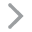
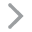

In [4]:
html_data = reponse.text
print(html_data) # 对比原始网页，看是静态还是动态

In [5]:
selector = parsel.Selector(html_data)
print(selector)

<Selector xpath=None data='<html><head><meta http-equiv="Content...'>


In [6]:
import csv
lis = selector.css(".clear.LOGCLICKDATA") # 所有的标签
for li in lis:
    title = li.css(".title a::text").get() # 标题
    address = li.css(".flood a::text").getall() # 房子地址
    address = "- ".join(address) # 合并
    introduce = li.css(".houseInfo::text").get() # 房子介绍
    star = li.css(".followInfo::text").get() # 房子关注
    tags = li.css(".tag span::text").getall() # 房子标签
    tags = "|".join(tags) # 合并
    totalprice = li.css(".priceInfo .totalPrice span::text").get() + "万元" # 房子价格
    unitprice = li.css(".priceInfo .unitPrice span::text").get() # 单价
#     print(title)
#     print(address)
#     print(introduce)
#     print(star)
#     print(tags)
#     print(totalprice)
#     print(unitprice)
    with open("house.csv",mode="w",encoding="utf-8",newline="") as f:
        csv_write = csv.writer(f)
        csv_write.writerow([title,address,introduce,star,tags,totalprice,unitprice])

# 采集喜马拉雅音频
逆向思维
先在静态数据找到音频链接 全局检索 找到相应请求，查看headers 找到request URL

多分析几个 找到规律

重复以上步骤，就可以找到想要的链接

然后从后往前执行
+ 1.在静态数据中获取音频id
+ 2.发送指定id值的json数据请求（src）
+ 3.从json中解析音频URL地址

In [7]:
import requests
url = "https://www.ximalaya.com/youshengshu/6303988/" # 西游记有声书
headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"} 

In [8]:
reponse = requests.get(url=url,headers=headers)
print(reponse)

<Response [200]>


'<!DOCTYPE html><html><head><title> 《西游记》原著说讲有声读物在线收听__喜马拉雅FM</title><meta charSet="utf-8"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta name="keywords" content="《西游记》原著说讲,经典小说,经典有声书,喜马拉雅FM"/><meta name="description" content="经典有声小说频道最近更新了《西游记》原著说讲的信息,您可以在线收听《西游记》原著说讲等经典小说节目，您也可以下载喜马拉雅FM收听更多有声书，更多幻想小说,就在喜马拉雅FM。"/><meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1"/><meta content="webkit" name="renderer"/><meta http-equiv="X-UA-Compatible" content="chrome=1"/><meta name="applicable-device" content="pc,mobile"/><meta http-equiv="Cache-Control" content="no-transform"/><meta http-equiv="Cache-Control" content="no-siteapp"/><meta name="google-site-verification" content="Ndgaz7H1uQvWACwf_q2IxyLYxBnomEREr1P_EsPq1GI"/><meta property="og:title" content=" 《西游记》原著说讲有声读物在线收听__喜马拉雅FM"/><meta property="og:description" content="经典有声小说频道最近更新了《西游记》原著说讲的信息,您可以在线收听《西游记》原著说讲等经典小说节目，您也可以下载喜马拉雅FM收听更多有声书，更多幻想小说,就在喜马拉雅FM。"/><link rel="canonical" href="https://www.ximalaya.com/"/><li
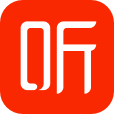

In [9]:
html_data = reponse.text
html_data

In [10]:
# 数据解析
import parsel
selector = parsel.Selector(html_data)
print(selector)

<Selector xpath=None data='<html><head><title> 《西游记》原著说讲有声读物在线收听...'>


In [11]:
import re
def change_title(title):
    """处理文件名非法字符"""
    pattern = re.compile(r"[/\\\\:\*\?\"\<\>\|]")
    new_title = re.sub(pattern,"_",title)
    return new_title
lis = selector.xpath('//div[@class="sound-list _is"]/ul/li')  # 取出所有li
for li in lis:
    title = li.xpath(".//a/@title").get()
    href = li.xpath(".//a/@href").get()
    m4a_id = href.split("/")[-1] # 取出id 字符串分割时
    
#     print(title,href,m4a_id)
    json_url = "https://www.ximalaya.com/revision/play/v1/audio?id={}&ptype=1".format(m4a_id)
    json_data = requests.get(url=json_url,headers=headers).json()
#     print(json_data)
    m4a_url = json_data["data"]["src"]
#     print(m4a_url)
    m4a_data = requests.get(url=m4a_url,headers=headers).content  # 提取二进制数据
    #  保存
    filename = title+".m4a"
    filename = change_title(filename)
    with open('video\\'+filename,mode="wb") as f:
        f.write(m4a_data)
        print("保存完成：",filename)

保存完成： 《西游记》第一回 灵根育孕源流出.m4a
保存完成： 《西游记》第二回 心性修持大道生.m4a
保存完成： 《西游记》第三回 悟彻菩提真妙理.m4a
保存完成： 《西游记》第四回 断魔归本合元神.m4a
保存完成： 《西游记》第五回 四海千山皆拱伏.m4a
保存完成： 《西游记》第六回 九幽十类尽除名.m4a
保存完成： 《西游记》第七回 官封弼马心何足.m4a
保存完成： 《西游记》第八回 名注齐天意未宁.m4a
保存完成： 《西游记》第九回 乱蟠桃大圣偷丹.m4a
保存完成： 《西游记》第十回 反天宫诸神捉怪.m4a
保存完成： 《西游记》第十一回 观音赴会问原因.m4a
保存完成： 《西游记》第十二回 小圣施威降大圣.m4a
保存完成： 《西游记》第十三回 八卦炉中逃大圣　.m4a
保存完成： 《西游记》第十四回 五行山下定心猿.m4a
保存完成： 《西游记》第十五回 我佛造经传极乐.m4a
保存完成： 《西游记》第十六回 观音奉旨上长安.m4a
保存完成： 《西游记》附录  上 陈光蕊赴任逢灾.m4a
保存完成： 《西游记》附录  下 江流僧复仇报本.m4a
保存完成： 《西游记》第十七回 袁守诚妙算无私曲.m4a
保存完成： 《西游记》第十八回 老龙王拙计犯天条.m4a
保存完成： 《西游记》第十九回 二将军宫门镇鬼.m4a
保存完成： 《西游记》第二十回 唐太宗地府还魂.m4a
保存完成： 《西游记》第二十一回 还受生唐王遵善果.m4a
保存完成： 《西游记》第二十二回 度孤魂萧瑀正空门.m4a
保存完成： 《西游记》第二十三回 玄奘秉诚建大会.m4a
保存完成： 《西游记》第二十四回 观音显象化金蝉.m4a
保存完成： 《西游记》第二十五回 陷虎穴金星解厄.m4a
保存完成： 《西游记》第二十六回 双叉岭伯钦留僧.m4a
保存完成： 《西游记》第二十七回 心猿归正.m4a
保存完成： 《西游记》第二十八回 六贼无踪.m4a


# 翻页循环

In [12]:
import requests,parsel,re
url = "https://www.ximalaya.com/youshengshu/6303988/p" # 西游记有声书
headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"} 
def change_title(title):
    """处理文件名非法字符"""
    pattern = re.compile(r"[/\\\\:\*\?\"\<\>\|]")
    new_title = re.sub(pattern,"_",title)
    return new_title

In [32]:
for i in range(1,8):
    new_url = url + str(i)
    reponse = requests.get(url=url,headers=headers)
    html_data = reponse.text
    selector = parsel.Selector(html_data)
    lis = selector.xpath('//div[@class="sound-list _is"]/ul/li')  # 取出所有li
    for li in lis:
        title = li.xpath(".//a/@title").get()
        href = li.xpath(".//a/@href").get()
        m4a_id = href.split("/")[-1] # 取出id 字符串分割时

    #     print(title,href,m4a_id)
        json_url = "https://www.ximalaya.com/revision/play/v1/audio?id={}&ptype=1".format(m4a_id)
        json_data = requests.get(url=json_url,headers=headers).json()
    #     print(json_data)
        m4a_url = json_data["data"]["src"]
    #     print(m4a_url)
        m4a_data = requests.get(url=m4a_url,headers=headers).content  # 提取二进制数据
        #  保存
        filename = title+".m4a"
        filename = change_title(filename)
        with open('video\\'+filename,mode="wb") as f:
            f.write(m4a_data)
            print("保存完成：",filename)


# 爬取豆瓣


In [6]:
from bs4 import BeautifulSoup  # 网页解析，数据获取
import re  # 正则表达式
import urllib.request  # 制定URL 获取网页数据
import xlwt  # 进行excel操作
import sqlite3  # 操作sqlite数据库操作


def main():
    baseurl = "https://movie.douban.com/top250?start="
    # 1 爬取网页
    datalist = getData(baseurl)
    savepath = "豆瓣电影top250.xls"
    # 3 保存数据到excel
    saveData(datalist, savepath)
    # 3 保存数据到数据库
    dbpath = "movie.db"
    saveData2DB(datalist, dbpath)


# 定义规则
# 影片详情连接的规则
findLink = re.compile(r'<a href="(.*?)">')  # 创建正则表达式对象，表达规则
# 图片连接的规则
findImgSrc = re.compile(r'<img.*src="(.*?)"', re.S)  # re.S 忽略换行
# 影片的片名
findTitle = re.compile(r'<span class="title">(.*)</span>')
# 影片的评分
findRating = re.compile(r'<span class="rating_num" property="v:average">(.*)</span>')
# 找到评价人数
findJudge = re.compile(r'<span>(\d*)人评价</span>')
# 找到概况
findInq = re.compile(r'<span class="inq"(.*)</span>')
# 找到影片的相关内容
findBd = re.compile(r'<p class="">(.*?)</p>', re.S)


# 爬取网页
def getData(baseurl):
    datalist = []
    for i in range(0, 10):  # 调用十次，250条
        url = baseurl + str(i * 25)
        html = askURL(url)  # 保存获取的网页源码
        # 2逐个解析数据
        soup = BeautifulSoup(html, "html.parser")
        for item in soup.find_all("div", class_="item"):  # 查找符合要求的字符串，形成列表
            # print(item) # 测试：查看电影贴膜全部信息
            data = []  # 保存一部电影所有信息
            item = str(item)
            # print(item)
            # break
            # 影片详情的超链接
            link = re.findall(findLink, item)[0]  # re库通过正则表达式查找指定字符串
            # print(link)
            data.append(link)  # 添加链接

            imgSrc = re.findall(findImgSrc, item)[0]
            data.append(imgSrc)  # 添加图片

            titles = re.findall(findTitle, item)  # 片名可能只有一个
            if len(titles) == 2:
                ctitile = titles[0]
                data.append(ctitile)  # 添加中文名
                otitle = titles[1].replace("/", "")  # 去掉无关的符号
                data.append(otitle)  # 添加外国名
            else:
                data.append(titles[0])
                data.append('')  # 外文名留空 防止错位

            rating = re.findall(findRating, item)[0]
            data.append(rating)  # 加评分

            judge = re.findall(findJudge, item)[0]
            data.append(judge)  # 加评价人数

            inq = re.findall(findInq, item)
            if len(inq) != 0:
                inq = inq[0].replace("。", "")
                data.append(inq)  # 添加概述
            else:
                data.append(" ")  # 留空

            bd = re.findall(findBd, item)[0]
            bd = re.sub('<br(\s+)?/>(\s+)?', " ", bd)  # 去掉br
            bd = re.sub('/', " ", bd)  # 替换去掉/
            data.append(bd.strip())  # 去掉前后的空格

            datalist.append(data)  # 把处理好的一部电影的数据放入datalist
    # print(datalist)
    return datalist


# 得到指定的一个url的网页内容
def askURL(url):
    # 少就用键值对，多就用列表
    head = {  # 模拟浏览器头部信息
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36"
    }  # 用户代理 表示自己不是爬虫，而是浏览器身份标识，本质是告诉浏览器我们能接受什么水平的文件
    request = urllib.request.Request(url, headers=head)
    try:
        response = urllib.request.urlopen(request)
        html = response.read().decode("utf-8")
        # print(html)
    except urllib.error.URLError as e:
        if hasattr(e, "code"):
            print(e.code)
        if hasattr(e, "reason"):
            print(e.reason)
    return html


# 3 保存数据到excel
def saveData(datalist, savepath):
    book = xlwt.Workbook(encoding="utf-8")  # 创建workbook 对象
    sheet = book.add_sheet("豆瓣电影250", cell_overwrite_ok=True)  # 创建工作表
    col = ("电影详情链接", "图片链接", "影片中文名", "外文名", "评分", "评价数", "概况", "相关信息")
    for i in range(0, len(col)):
        sheet.write(0, i, col[i])
    for i in range(0, 250):
        print("第%d条" % i)
        data = datalist[i]
        for j in range(0, 8):
            sheet.write(i + 1, j, data[j])  # 写入数据
    book.save("savepath")  # 保存数据表
    pass


# 3 保存数据到数据库
def saveData2DB(datalist, dbpath):
    init_db(dbpath)
    conn = sqlite3.connect(dbpath)
    cur = conn.cursor()
    for data in datalist:
        for index in range(len(data)):  # 给数据加引号拼装
            if index == 4 or index == 5:
                continue
            data[index] = '"' + data[index] + '"'

        # 每拼好一个存一次，注意在一个for循环里
        sql = '''
                insert into movie250 (
                info_link,pic_link,cname,
                ename,score,rated,
                introduction,info
                )
                values(%s)
            ''' % ",".join(data)
        # print(sql) # 调试时可以打印出来复制到sql中执行
        cur.execute(sql)
        conn.commit()
    cur.close()
    conn.close()


# 初始化数据库
def init_db(dbpath):
    sql = '''
    create table movie250
    (
    id integer primary key autoincrement,
    info_link text,
    pic_link text,
    cname varchar,
    ename varchar,
    score numeric,
    rated numeric,
    introduction text,
    info text
    )
    '''  # 创建数据表
    conn = sqlite3.connect(dbpath)
    cursor = conn.cursor()
    cursor.execute(sql)
    conn.commit()
    cursor.close()
    conn.close()


if __name__ == "__main__":
    # 调用函数，控制流程，保证入口

    # init_db("movietest.db")   # 测试sqlite语句
    main()


第0条
第1条
第2条
第3条
第4条
第5条
第6条
第7条
第8条
第9条
第10条
第11条
第12条
第13条
第14条
第15条
第16条
第17条
第18条
第19条
第20条
第21条
第22条
第23条
第24条
第25条
第26条
第27条
第28条
第29条
第30条
第31条
第32条
第33条
第34条
第35条
第36条
第37条
第38条
第39条
第40条
第41条
第42条
第43条
第44条
第45条
第46条
第47条
第48条
第49条
第50条
第51条
第52条
第53条
第54条
第55条
第56条
第57条
第58条
第59条
第60条
第61条
第62条
第63条
第64条
第65条
第66条
第67条
第68条
第69条
第70条
第71条
第72条
第73条
第74条
第75条
第76条
第77条
第78条
第79条
第80条
第81条
第82条
第83条
第84条
第85条
第86条
第87条
第88条
第89条
第90条
第91条
第92条
第93条
第94条
第95条
第96条
第97条
第98条
第99条
第100条
第101条
第102条
第103条
第104条
第105条
第106条
第107条
第108条
第109条
第110条
第111条
第112条
第113条
第114条
第115条
第116条
第117条
第118条
第119条
第120条
第121条
第122条
第123条
第124条
第125条
第126条
第127条
第128条
第129条
第130条
第131条
第132条
第133条
第134条
第135条
第136条
第137条
第138条
第139条
第140条
第141条
第142条
第143条
第144条
第145条
第146条
第147条
第148条
第149条
第150条
第151条
第152条
第153条
第154条
第155条
第156条
第157条
第158条
第159条
第160条
第161条
第162条
第163条
第164条
第165条
第166条
第167条
第168条
第169条
第170条
第171条
第172条
第173条
第174条
第175条
第176条
第177条
第178条
第179条
第180条
第181条
第182条
第183条
第184条
